### Code for the manuscript: 
# "Temperature and patterns of occurrence and abundance of key copepod in the NorthEast Pacific"
### by: Lauren Ashlock, Marisol García-Reyes, Chelle Gentemann, Sonia Batten, William Sydeman

***
## Code by: M. García-Reyes. Jan, 2021

In [7]:
import xarray as xr
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import cartopy.crs as ctp
import cartopy.feature as cfeature
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
import warnings
warnings.simplefilter('ignore')

In [8]:
#get bathymetry from ETOPO1
fname_topo = '~/Documents/LargeData/Etopo/ETOPO1_Ice_g_gmt4.grd'
# available at: https://www.ngdc.noaa.gov/mgg/global/relief/ETOPO1/data/ice_surface/grid_registered/netcdf/
ds_topo = xr.open_dataset(fname_topo)
ds_topo.close()
topo = ds_topo.z  #(10801, 21601)
topo2=topo.sel(x=slice(-180,-125),y=slice(48,61))
x = topo2.x  #21601
y = topo2.y   #10801
X,Y=np.meshgrid(x,y)

In [9]:
Regional=pd.read_csv('Ashlock_Copepod_data_29Jan2021.csv', index_col=0)
spp=['Neocalanus plumchrus V','Calanus pacificus','Oithona spp.']
Regional['analysed_sst_1mon']=Regional['analysed_sst_1mon']-273.15
Regional['analysed_sst_15dy']=Regional['analysed_sst_15dy']-273.15
Regional['analysed_sst']=Regional['analysed_sst']-273.15
Regional.head()

,time,d/n,day,month,year,Date,lat,lon,depth,Calanus pacificus,Neocalanus plumchrus V,Oithona spp.,SST,SST3,region,analysed_sst,analysed_sst_1mon,analysed_sst_15dy
index,,,,,,,,,,,,,,,,,,
0,16:10:00,d,30,6,2000,6/30/00 0:00,54.736667,-174.581667,-3641.778428,0,0,150,6.061222,6.061222,4,6.79293,5.47656,6.02154
1,13:07:00,d,30,6,2000,6/30/00 0:00,54.696667,-173.431667,-3609.077192,0,0,100,6.140098,6.140098,4,6.93606,5.70272,6.18420
2,10:04:00,d,30,6,2000,6/30/00 0:00,54.656667,-172.283333,-3574.672000,0,0,50,6.244102,6.244102,4,6.92660,5.75918,6.23086
3,7:01:00,d,30,6,2000,6/30/00 0:00,54.616667,-171.136667,-3281.848000,0,0,0,6.385465,6.385465,4,7.26037,5.96487,6.45126
4,3:58:00,d,30,6,2000,6/30/00 0:00,54.576667,-169.990000,-1834.214400,0,0,300,6.931098,6.931098,3,7.21288,6.05816,6.50378


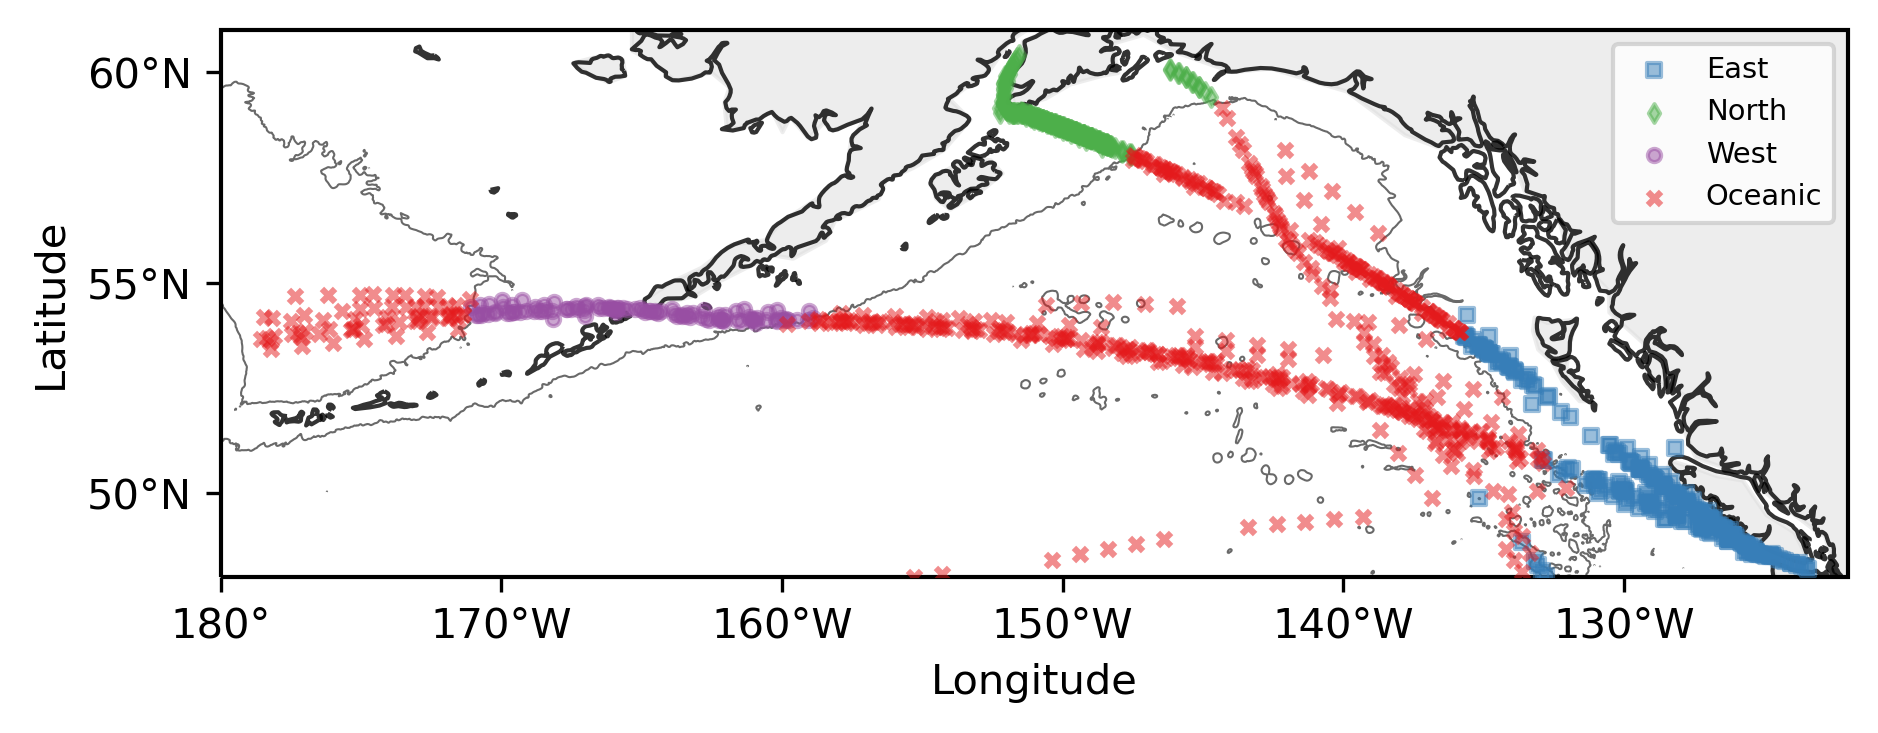

In [10]:
cls=['#377eb8', '#ff7f00', '#4daf4a','#f781bf', '#a65628', '#984ea3','#999999', '#e41a1c', '#dede00']
# figure 1. samples and location of bins (and number of samples in each)
fig = plt.figure(figsize=(7,3),dpi=300)
ax = plt.axes(projection=ctp.PlateCarree())
ax.coastlines(resolution='50m',linewidth=1,color='black',alpha=0.8, zorder=1)
ax.add_feature(cfeature.LAND, facecolor='gainsboro', alpha=0.5)
ax.set_extent([-180,-122,48,61],crs=ctp.PlateCarree())
ax.set_xticks([-180, -170, -160, -150, -140, -130], crs=ctp.PlateCarree())
ax.set_yticks([50,55,60], crs=ctp.PlateCarree())

plt.contour(X,Y,topo2,[-3000],colors='dimgrey',linewidths=0.5, linestyles='solid', zorder=2)

a=Regional[Regional['region']==1]
plt.scatter(a['lon'],a['lat'],c=cls[0],marker='s',s=10, alpha=0.5, zorder=4, label='East')
a=Regional[Regional['region']==2]
plt.scatter(a['lon'],a['lat'],c=cls[2],marker='d',s=10, alpha=0.5, zorder=4, label='North')
a=Regional[Regional['region']==3]
plt.scatter(a['lon'],a['lat'],c=cls[5],marker='o',s=10, alpha=0.5, zorder=4, label='West')
a=Regional[Regional['region']==4]
plt.scatter(a['lon'],a['lat'],c=cls[7],marker='x',s=10, alpha=0.5, zorder=4, label='Oceanic')

lon_formatter = LongitudeFormatter(zero_direction_label=True)
lat_formatter = LatitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)
plt.ylabel('Latitude')
plt.xlabel('Longitude')
plt.legend(loc=0, fontsize='x-small')
ax.set_aspect(1.5)
plt.savefig('./figures/fig1_final.jpg')
plt.show()

In [11]:
var='analysed_sst_15dy'
# all samples
mT=int(math.floor(Regional[var].min()))
xT=int(math.ceil(Regional[var].max()))
presabs=np.full((len(np.arange(mT,xT)),3),np.nan)
per95=np.full((len(np.arange(mT,xT)),3),np.nan)
temp=list()
samp=list()
for j,i in enumerate(np.arange(mT,xT)):
    x=Regional.loc[(Regional[var]>=i-0.5) & (Regional[var]<i+0.5)]
    temp.append(i)
    samp.append(len(x))
    if len(x)>0:
        for k in range(3):
            presabs[j,k]=(np.nansum(np.where(Regional[spp[k]][x.index]>0,1,np.nan))/len(x))*100
            per95[j,k]=np.percentile(Regional[spp[k]][x.index],95)+1
            
# normalize abundance to max 95%
per95n=per95.copy()
for k in range(3):
    xab=np.nanmax(per95[:,k])
    #print(xab)
    per95n[:,k]=per95n[:,k]*100/xab

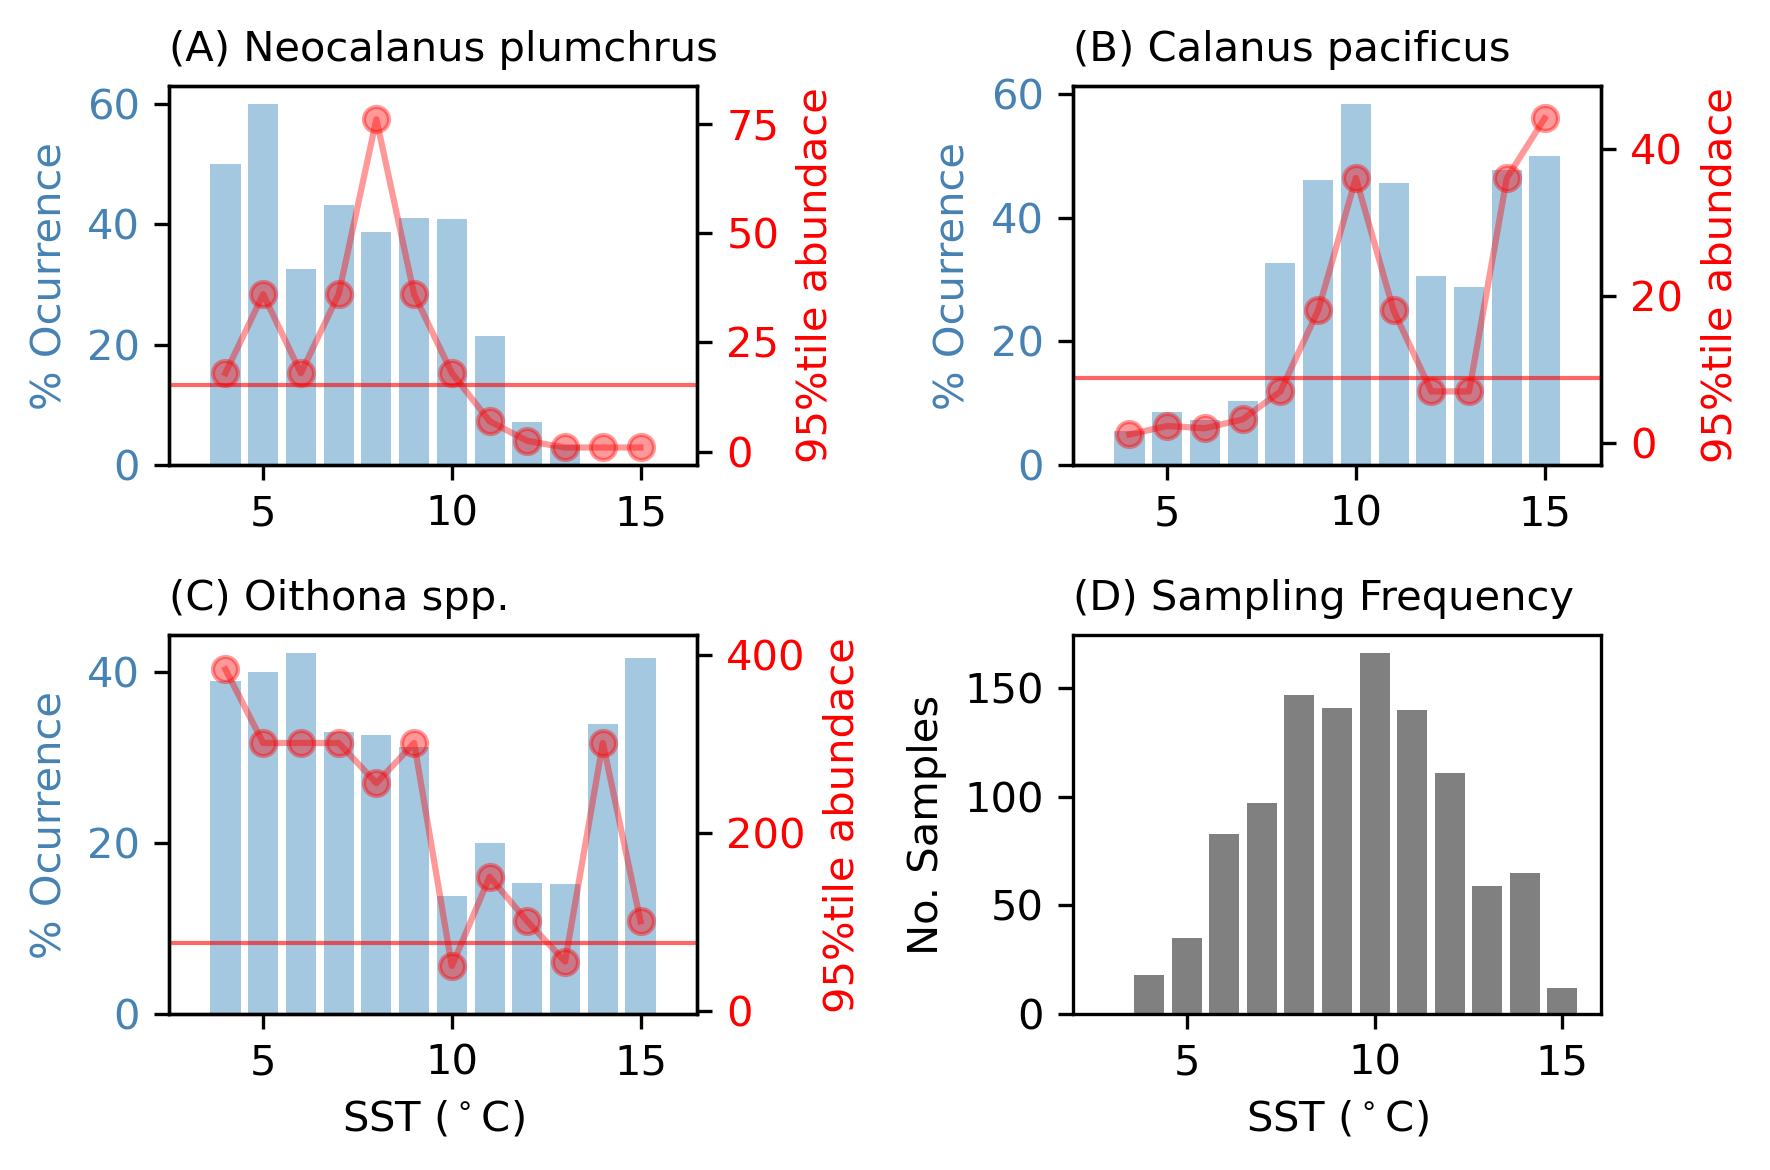

In [12]:
sppl=['(A) Neocalanus plumchrus','(B) Calanus pacificus','(C) Oithona spp.']

# plot of presence abs
fig=plt.figure(figsize=(6,4),dpi=300)

for k in range(3):
    ax1 = plt.subplot(2,2,k+1)
    ax1.bar(temp,presabs[:,k],alpha=0.4)
    # 25% of max pres
    x=np.nanmax(presabs[:,k])*0.2
    #ax1.plot([2,17],[x,x],'-',color='steelblue',alpha=0.6,linewidth=1)
    ax1.set_ylabel('% Ocurrence', color='steelblue')
    plt.yticks(color='steelblue')
    ax1.set_xlim(2.5,16.5)
    plt.title(sppl[k], fontsize=10, loc='left')
    
    ax2 = ax1.twinx()
    ax2.plot(temp,per95[:,k],'or-',alpha=0.4)
    # 25% of max pres
    x=np.nanmax(per95[:,k])*0.2
    ax2.plot([2,17],[x,x],'-',color='r',alpha=0.6,linewidth=1)
    ax2.set_ylabel('95%tile abundace', color='r')
    #ax2.set_yscale('log')
    plt.yticks(color='r')
    ax2.set_ylim(-3,np.nanmax(per95[:,k]*1.1))
    ax2.set_xlim(2.5,16.5)
    if k==2:
        ax1.set_xlabel('SST ($^\circ$C)')

plt.subplot(2,2,4)
plt.bar(temp,samp,color='gray')
plt.title('(D) Sampling Frequency', fontsize=10, loc='left')
plt.xlabel('SST ($^\circ$C)')
plt.ylabel('No. Samples')


fig.tight_layout() 
plt.savefig('./figures/fig2_final.jpg')

In [13]:
ds = xr.open_dataset('SST_Hadley.nc')
# make 3 masks for SST
# 1. region
# 2. depth
# 3. cpr data available
mask1=ds.SST[0,:,:].copy()
mask1[:,:]=np.nan
mask2=ds.SST[0,:,:].copy()
mask2[:,:]=np.nan# depth
mask3=ds.SST[0,:,:].copy()
mask3[:,:]=np.nan
for i,iv in enumerate(ds.latitude.values):
    for j,jv in enumerate(ds.longitude.values):    
        depths=topo.sel(x=slice(jv-0.5,jv+0.5),y=slice(iv-0.5,iv+0.5))
        mdp=np.nanmean(depths.values)
        if mdp<=0:
            mask2[i,j]=mdp  
            if mdp<-3000: 
                mask1[i,j]=4
            else:
                if (jv>=-175) & (jv<=-155):
                    mask1[i,j]=3
                elif (jv>=-152) & (jv<=-140):
                    mask1[i,j]=2
                elif (jv>=-136):
                    mask1[i,j]=1
        samp=Regional.loc[(Regional['lon']>=jv-0.5) & (Regional['lon']<jv+0.5) & (Regional['lat']>=iv-0.5) & (Regional['lat']<iv+0.5)]
        if len(samp)>0:
            mask3[i,j]=1

#mask4.plot()
mask4=mask1*mask3

In [14]:
# make monthly time series for each region.
msst=np.full((len(ds.time),4),np.nan)
for i in range(4): # regions
    tmp_mask=mask4.where(mask4==i+1)
    for j,jv in enumerate(ds.time.values):
        mo = pd.DatetimeIndex([jv]).month.values[0]
        if (mo >= 5) & (mo<=8): 
            msst[j,i]=np.nanmean((tmp_mask*ds.SST[j,:,:]).values)/(i+1)
mon=pd.DatetimeIndex(ds.time.values).month.values
yrs=pd.DatetimeIndex(ds.time.values).year.values

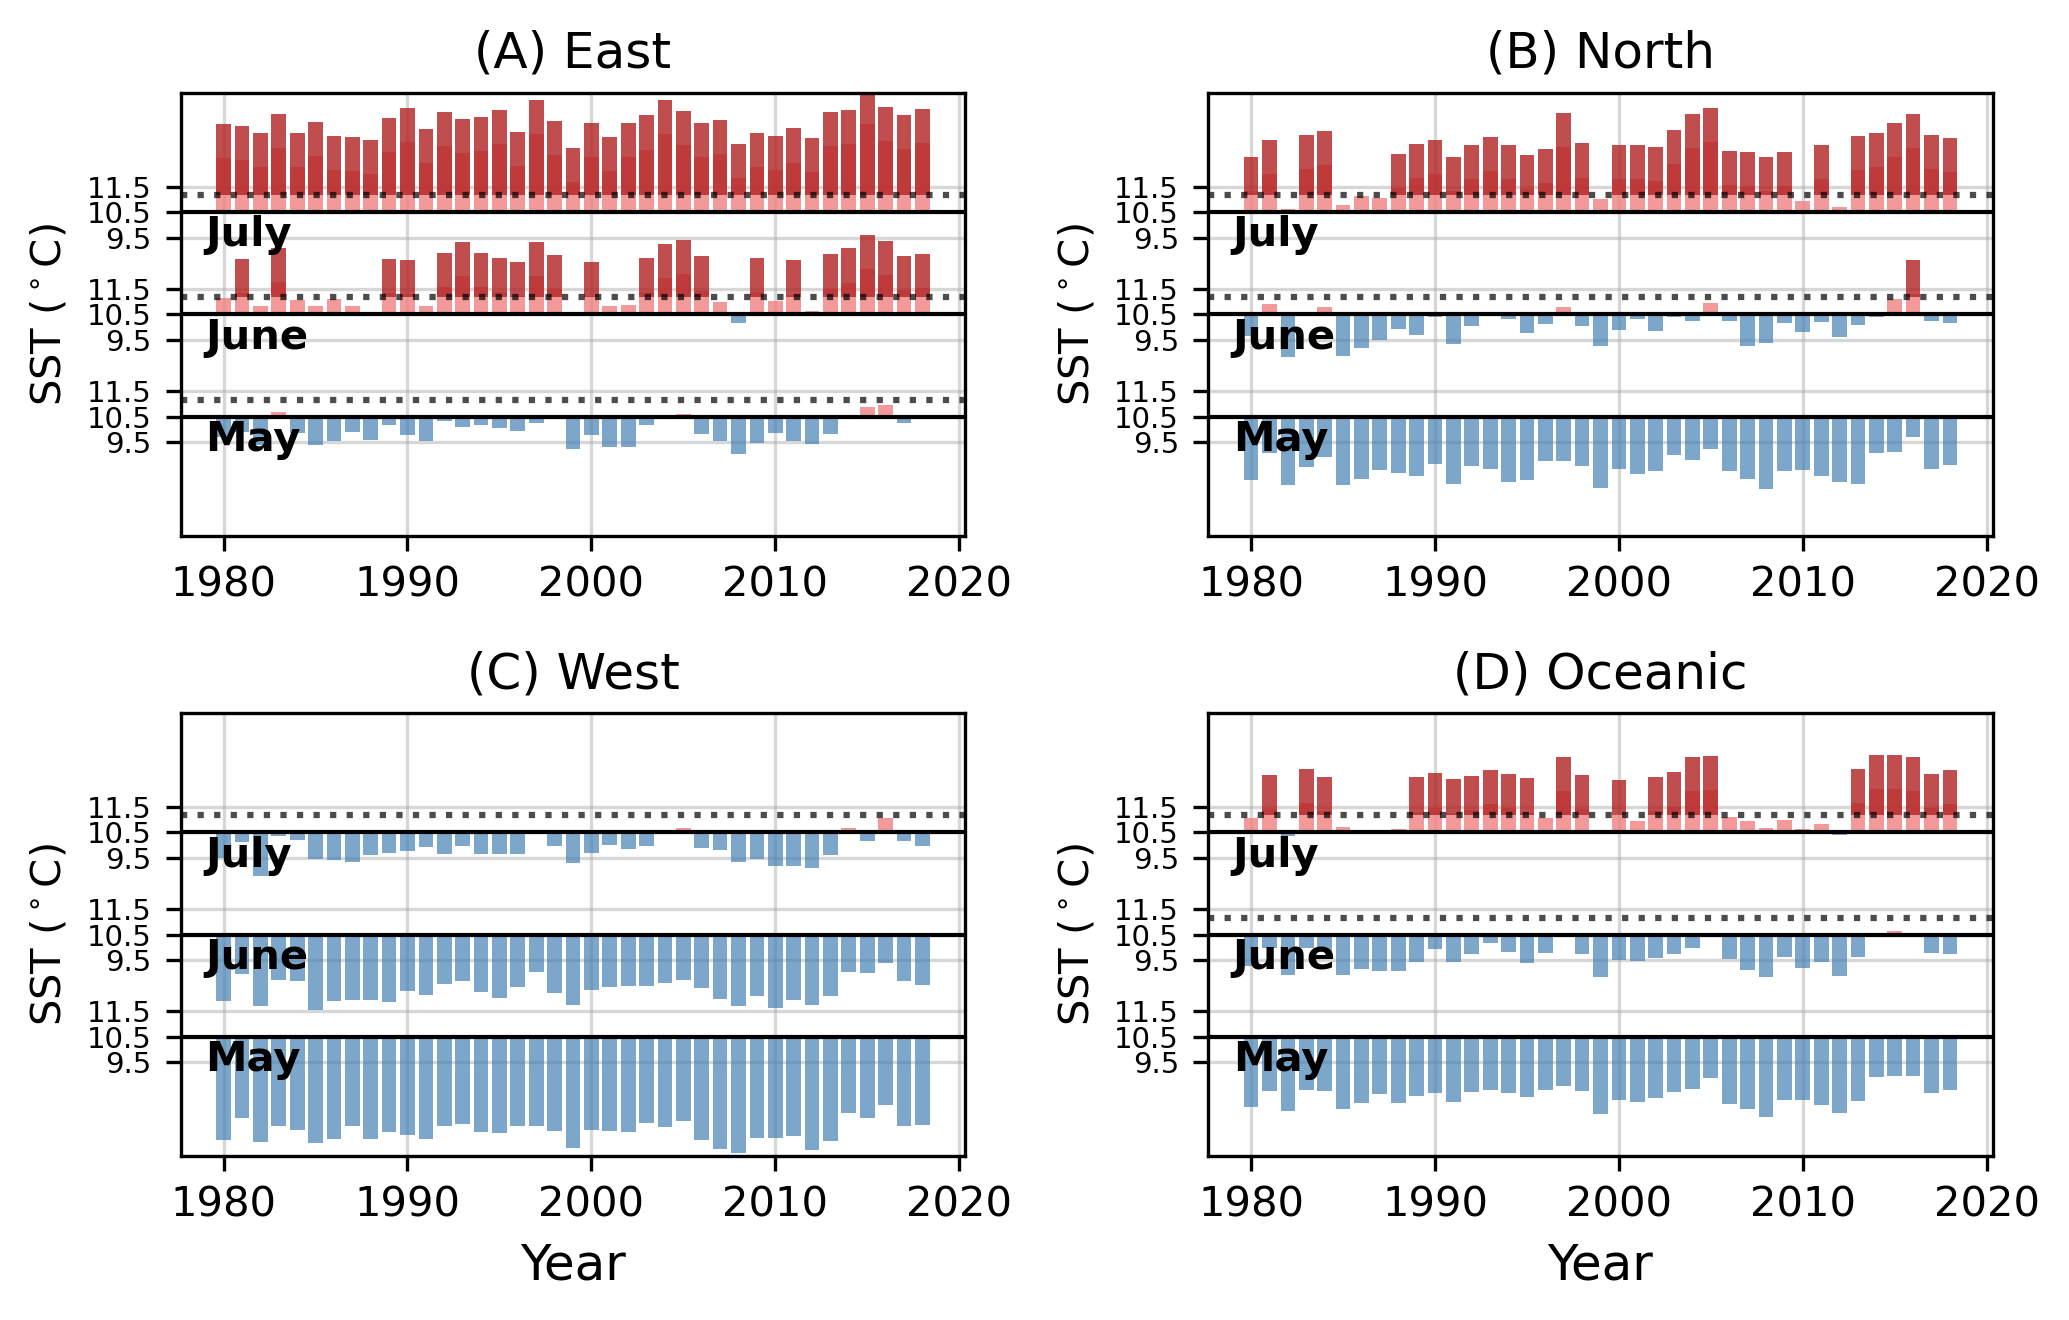

In [15]:
fig=plt.figure(figsize=(7,4.5),dpi=300)
bass=[0, 6, 12]
bass2=[-1.5,0,1.5,4.5,6,7.5,10.5,12,13.5]
bass3=['9.5','10.5','11.5','9.5','10.5','11.5','9.5','10.5','11.5']
mons=['May','June','July']
mg=7 # ??
tits=['(A) East','(B) North','(C) West','(D) Oceanic']
for i in range(4):
    ax1=plt.subplot(2,2,i+1)
    for j in [5,6,7]:
        mon2=mon==j
        tmp1=msst[mon2,i]
        tmp2=tmp1-10.5 # occurrence threshold for plumchrus (base at 0)
        a=tmp2>0
        b=tmp2<0
        c=tmp2>=1 # abundance threshold 11.5C
        plt.bar(yrs[mon2][a],tmp2[a],bottom=bass[j-5],color='lightcoral',alpha=0.8,zorder=2)
        plt.bar(yrs[mon2][c],tmp2[c]+1,bottom=bass[j-5]+1,color='firebrick',alpha=0.8,zorder=2)
        plt.bar(yrs[mon2][b],tmp2[b],bottom=bass[j-5],color='steelblue',alpha=0.7,zorder=2)
        plt.axhline(bass[j-5],c='k',lw=1,zorder=2)
        if len(tmp2[a]>0):
            plt.axhline(bass[j-5]+1,ls=':',lw=1.5,c='k',zorder=3, alpha=0.7)
    locs, labels = plt.yticks()            # Get locations and labels
    plt.yticks(bass2,bass3,fontsize=7)
    plt.xticks(fontsize=10)
    for x in [0,1,2]:
        plt.text(1979,bass[x]-2,mons[x],fontsize=10,fontweight='bold')
    if i>1:
        plt.xlabel('Year', fontsize=12)
    plt.ylim(-mg,bass[2]+mg)
    plt.grid(True, alpha=0.5,zorder=0)
    plt.ylabel('SST ($^\circ$C)')
    plt.title(tits[i])
fig.tight_layout() 
plt.savefig('./figures/fig3_final.jpg')

In [16]:
# per depth
mT=int(math.floor(Regional['analysed_sst_15dy'].min()))
xT=int(math.ceil(Regional['analysed_sst_15dy'].max()))
presabs1=np.full((len(np.arange(mT,xT)),3),np.nan)
per951=np.full((len(np.arange(mT,xT)),3),np.nan)
presabs2=np.full((len(np.arange(mT,xT)),3),np.nan)
per952=np.full((len(np.arange(mT,xT)),3),np.nan)
temp1=list()
temp2=list()
samp1=list()
samp2=list()
for j,i in enumerate(np.arange(mT,xT)):
    x=Regional.loc[(Regional['analysed_sst_15dy']>=i-0.5) & (Regional['analysed_sst_15dy']<i+0.5) & (Regional['region']<4)]
    temp1.append(i)
    samp1.append(len(x))
    if len(x)>0:
        for k in range(3):
            presabs1[j,k]=(np.nansum(np.where(Regional[spp[k]][x.index]>0,1,np.nan))/len(x))*100
            per951[j,k]=np.percentile(Regional[spp[k]][x.index],95)
    x=Regional.loc[(Regional['analysed_sst_15dy']>=i-0.5) & (Regional['analysed_sst_15dy']<i+0.5) & (Regional['region']==4)]
    temp2.append(i)
    samp2.append(len(x))
    if len(x)>0:
        for k in range(3):
            presabs2[j,k]=(np.nansum(np.where(Regional[spp[k]][x.index]>0,1,np.nan))/len(x))*100
            per952[j,k]=np.percentile(Regional[spp[k]][x.index],95)
            
# normalize abundance to max 95%
per951n=per951.copy()
per952n=per952.copy()
for k in range(3):
    xab=np.nanmax(per951[:,k])
    print(xab)
    per951n[:,k]=per951n[:,k]*100/xab+1
    xab=np.nanmax(per952[:,k])
    print(xab)
    per952n[:,k]=per952n[:,k]*100/xab+1

75.0
75.0
48.89999999999994
40.19999999999992
300.0
850.0


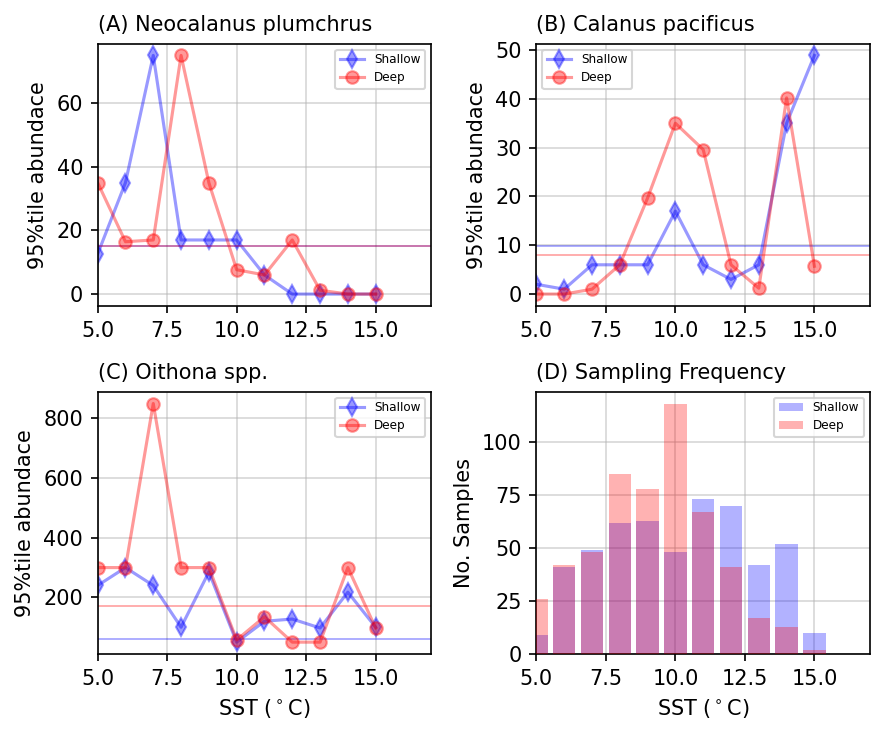

In [17]:
# plot of presence abs depth/shallow - normalized
fig=plt.figure(figsize=(6,5),dpi=150)

for k in range(3):
    plt.subplot(2,2,k+1)
    plt.plot(temp1,per951[:,k],'db-',alpha=0.4,label='Shallow')
    # 25% of max ab
    x=np.nanmax(per951[:,k])*0.2
    plt.plot([2,17],[x,x],'-',color='b',alpha=0.4,linewidth=0.75)
    
    plt.plot(temp2,per952[:,k],'or-',alpha=0.4,label='Deep')
    # 25% of max ab
    x=np.nanmax(per952[:,k])*0.2
    plt.plot([2,17],[x,x],'-',color='r',alpha=0.4,linewidth=0.75)
    
    plt.ylabel('95%tile abundace')
    #plt.yscale('log')
    #plt.ylim(1,105)
    plt.xlim(5,17)
    plt.legend(loc=0, fontsize='xx-small')
    plt.title(sppl[k], loc='left', fontsize=10)
    plt.grid(alpha=0.5,zorder=1)
    if k>1:
        plt.xlabel('SST ($^\circ$C)')

    
plt.subplot(2,2,4)
plt.bar(temp1,samp1,color='b',alpha=.3,label='Shallow',zorder=2)
plt.bar(temp2,samp2,color='r',alpha=.3,label='Deep',zorder=3)
plt.title('(D) Sampling Frequency', fontsize=10, loc='left')
plt.xlabel('SST ($^\circ$C)')
plt.ylabel('No. Samples')
plt.xlim(5,17)
plt.legend(loc=0, fontsize='xx-small')
plt.grid(alpha=0.5,zorder=1)


fig.tight_layout() 
plt.savefig('./figures/fig2S_final.jpg')

In [18]:
# per region
mT=int(math.floor(Regional['SST'].min()))
xT=int(math.ceil(Regional['SST'].max()))
presabs1=np.full((len(np.arange(mT,xT)),3),np.nan)
per951=np.full((len(np.arange(mT,xT)),3),np.nan)
presabs2=np.full((len(np.arange(mT,xT)),3),np.nan)
per952=np.full((len(np.arange(mT,xT)),3),np.nan)
presabs3=np.full((len(np.arange(mT,xT)),3),np.nan)
per953=np.full((len(np.arange(mT,xT)),3),np.nan)
presabs4=np.full((len(np.arange(mT,xT)),3),np.nan)
per954=np.full((len(np.arange(mT,xT)),3),np.nan)
temp1=list()
temp2=list()
samp1=list()
samp2=list()
temp3=list()
temp4=list()
samp3=list()
samp4=list()
for j,i in enumerate(np.arange(mT,xT)):
    x=Regional.loc[(Regional['analysed_sst_15dy']>=i-0.5) & (Regional['analysed_sst_15dy']<i+0.5) & (Regional['region']==1)]
    temp1.append(i)
    samp1.append(len(x))
    if len(x)>0:
        for k in range(3):
            presabs1[j,k]=(np.nansum(np.where(Regional[spp[k]][x.index]>0,1,np.nan))/len(x))*100
            per951[j,k]=np.percentile(Regional[spp[k]][x.index],95)
    
    x=Regional.loc[(Regional['analysed_sst_15dy']>=i-0.5) & (Regional['analysed_sst_15dy']<i+0.5) & (Regional['region']==2)]
    temp2.append(i)
    samp2.append(len(x))
    if len(x)>0:
        for k in range(3):
            presabs2[j,k]=(np.nansum(np.where(Regional[spp[k]][x.index]>0,1,np.nan))/len(x))*100
            per952[j,k]=np.percentile(Regional[spp[k]][x.index],95)
    
    x=Regional.loc[(Regional['analysed_sst_15dy']>=i-0.5) & (Regional['analysed_sst_15dy']<i+0.5) & (Regional['region']==3)]
    temp3.append(i)
    samp3.append(len(x))
    if len(x)>0:
        for k in range(3):
            presabs3[j,k]=(np.nansum(np.where(Regional[spp[k]][x.index]>0,1,np.nan))/len(x))*100
            per953[j,k]=np.percentile(Regional[spp[k]][x.index],95)
    
    x=Regional.loc[(Regional['analysed_sst_15dy']>=i-0.5) & (Regional['analysed_sst_15dy']<i+0.5) & (Regional['region']==4)]
    temp4.append(i)
    samp4.append(len(x))
    if len(x)>0:
        for k in range(3):
            presabs4[j,k]=(np.nansum(np.where(Regional[spp[k]][x.index]>0,1,np.nan))/len(x))*100
            per954[j,k]=np.percentile(Regional[spp[k]][x.index],95)
            
# normalize abundance to max 95%
per951n=per951.copy()
per952n=per952.copy()
per953n=per953.copy()
per954n=per954.copy()
for k in range(3):
    xab=np.nanmax(per951[:,k])
    print(xab)
    per951n[:,k]=per951n[:,k]*100/xab+1
    xab=np.nanmax(per952[:,k])
    print(xab)
    per952n[:,k]=per952n[:,k]*100/xab+1
    xab=np.nanmax(per953[:,k])
    print(xab)
    per953n[:,k]=per953n[:,k]*100/xab+1
    xab=np.nanmax(per954[:,k])
    print(xab)
    per954n[:,k]=per954n[:,k]*100/xab+1

57.59999999999995
75.0
35.0
75.0
48.89999999999994
35.0
65.0
40.19999999999992
225.0
492.49999999999983
650.0
850.0


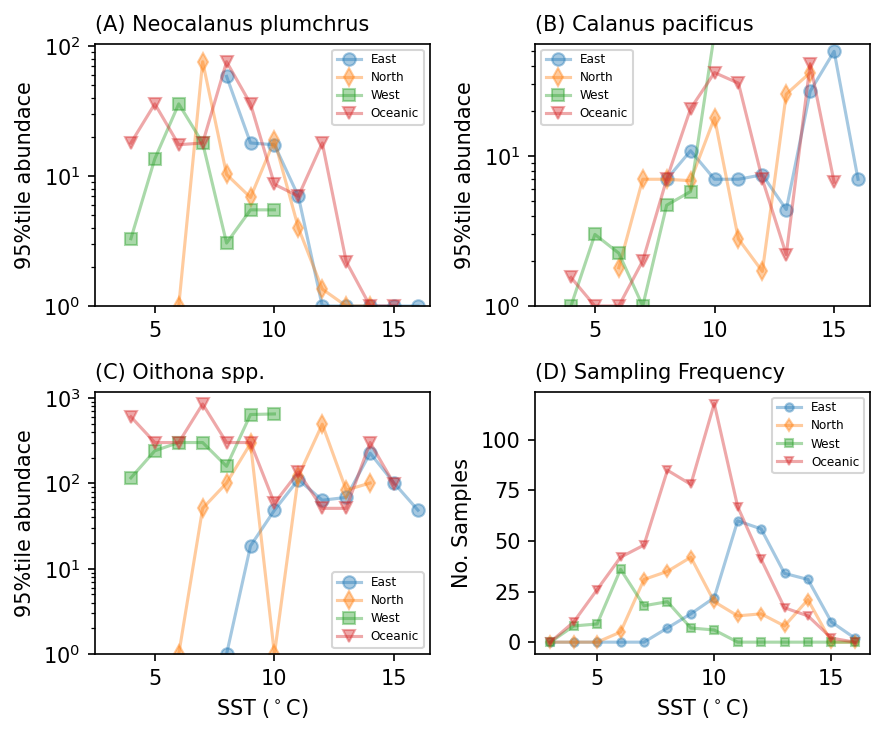

In [19]:
# plot of presence abs depth/shallow - normalized
fig=plt.figure(figsize=(6,5),dpi=150)

for k in range(3):
    plt.subplot(2,2,k+1)
    plt.plot(temp1,per951[:,k]+1,'o-',alpha=0.4,label='East')
    plt.plot(temp1,per952[:,k]+1,'d-',alpha=0.4,label='North')
    plt.plot(temp1,per953[:,k]+1,'s-',alpha=0.4,label='West')
    plt.plot(temp1,per954[:,k]+1,'v-',alpha=0.4,label='Oceanic')
    #plt.plot([2,17],[np.nanmax(per951[:,k])*0.2,np.nanmax(per951[:,k])*0.2],'-',color='steelblue',alpha=0.5,linewidth=0.7)
    #plt.plot([2,17],[np.nanmax(per952[:,k])*0.2,np.nanmax(per952[:,k])*0.2],'-',color='orange',alpha=0.5,linewidth=0.7)
    #plt.plot([2,17],[np.nanmax(per953[:,k])*0.2,np.nanmax(per953[:,k])*0.2],'-',color='darkgreen',alpha=0.5,linewidth=0.7)
    #plt.plot([2,17],[np.nanmax(per954[:,k])*0.2,np.nanmax(per954[:,k])*0.2],'-',color='r',alpha=0.5,linewidth=0.7)
    plt.xlim(2.5,16.5)
    plt.ylabel('95%tile abundace')
    plt.yscale('log')
    plt.ylim(1,np.nanmax(per954[:,k]*1.4))
    plt.legend()
    plt.title(sppl[k], loc='left', fontsize=10)
    
    if k==2:
        plt.xlabel('SST ($^\circ$C)')

    plt.legend(loc=0, fontsize='xx-small')
    
plt.subplot(2,2,4)
plt.plot(temp1,samp1,'o-',alpha=0.4,label='East', markersize=4)
plt.plot(temp1,samp2,'d-',alpha=0.4,label='North', markersize=4)
plt.plot(temp1,samp3,'s-',alpha=0.4,label='West', markersize=4)
plt.plot(temp1,samp4,'v-',alpha=0.4,label='Oceanic', markersize=4)
plt.title('(D) Sampling Frequency', loc='left', fontsize=10)
plt.xlabel('SST ($^\circ$C)')
plt.ylabel('No. Samples')
plt.legend(loc=0, fontsize='xx-small')


fig.tight_layout() 
plt.savefig('./figures/fig3S_final.jpg')

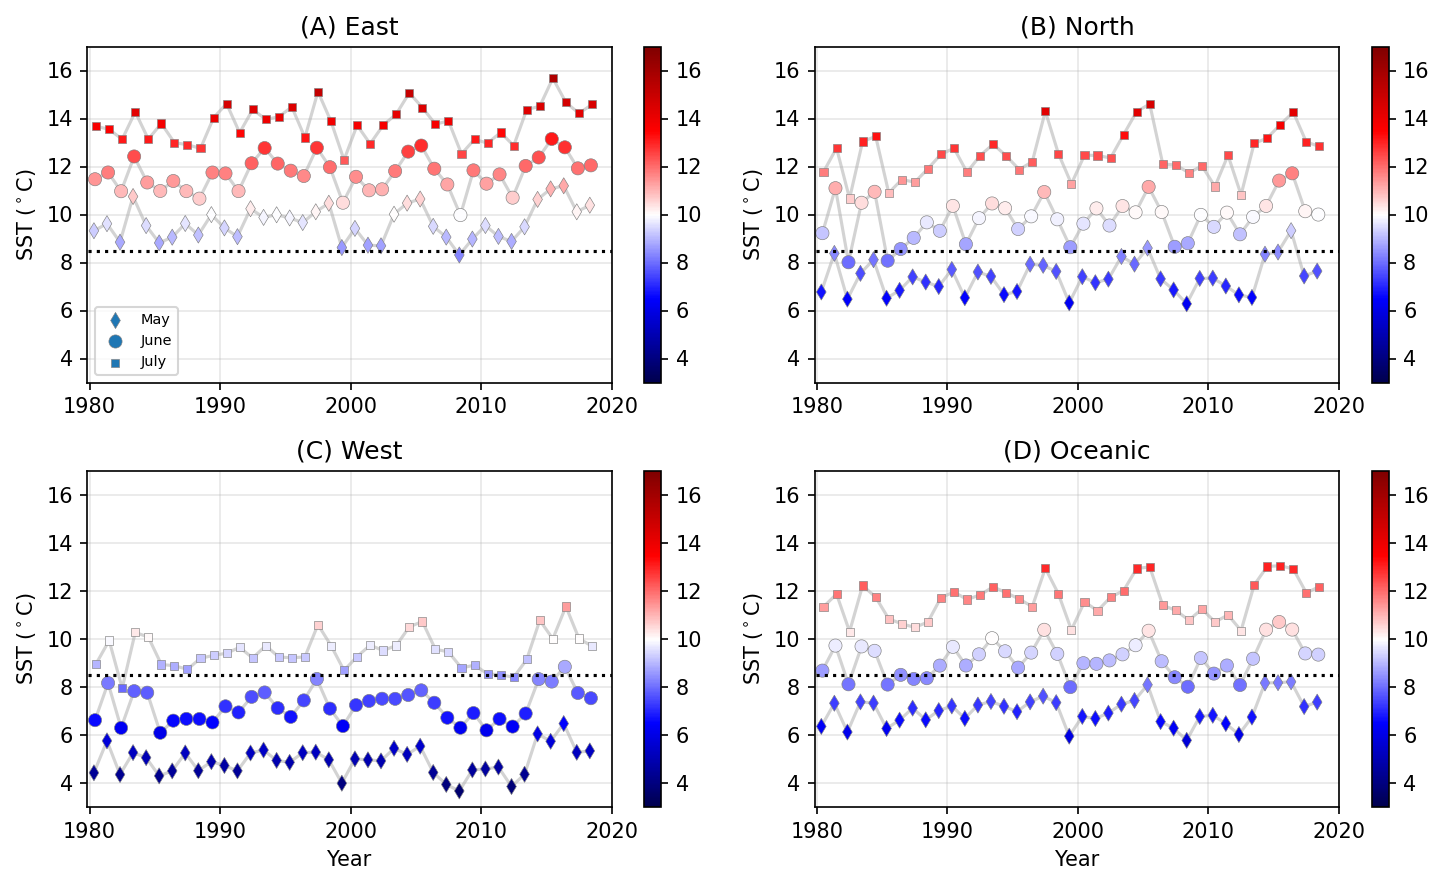

In [20]:
fig=plt.figure(figsize=(10,6),dpi=150)
mon=pd.DatetimeIndex(ds.time.values).month.values
mmk=['d','o','s','.']
smk=[30,40,15,30]
monla=['May','June','July','August']
for i in range(4):
    plt.subplot(2,2,i+1)
    for j in [5,6,7]:
        mon2=mon==j
        plt.plot(ds.time.values[mon2],msst[mon2,i],'k-',c='lightgrey',zorder=1)
        plt.scatter(ds.time.values[mon2],msst[mon2,i],c=msst[mon2,i],alpha=1,cmap='seismic',s=smk[j-5],marker=mmk[j-5],edgecolor='grey',linewidth=0.3,vmin=3, vmax=17,label=monla[j-5],zorder=2)
    plt.colorbar()
    plt.plot([np.datetime64('1979-12-16'),np.datetime64('2020-01-16')],[8.5,8.5],'k:')
    #plt.plot([np.datetime64('1979-12-16'),np.datetime64('2020-01-16')],[11.5,11.5],'k:', alpha=0.9)
    plt.title(tits[i])
    plt.ylabel('SST ($^\circ$C)')
    if i>1:
        plt.xlabel('Year')
    if i==0:
        plt.legend(loc=0, fontsize='x-small')
    plt.grid('minor',alpha=0.3)
    plt.ylim(3,17)
    plt.xlim([np.datetime64('1979-11-16'),np.datetime64('2020-01-16')])
    plt.xticks([np.datetime64('1980-01-16'),np.datetime64('1990-01-16'),np.datetime64('2000-01-16'),np.datetime64('2010-01-16'),np.datetime64('2020-01-16')],['1980','1990','2000','2010','2020'])

fig.tight_layout() 
plt.savefig('./figures/fig4S_final.jpg')